In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import re
import pathlib
pathlib.Path().resolve()
ranks = [1,2,3,4,5,6]
idx_max = 10
scale = [12,14,16,18,20,22]
thread = [1,2,4,8]
block = ["blocking","nonblocking"]

In [2]:
with open("gaspi.txt", "w") as f:
       f.write("")
f.close
def filewriter(pgas,network,block, segment, thread,time,scale="",rank=""):
    #with open("gaspi.txt", "w") as f:
    #    f.write("")
    #f.close
    if len(rank)> 2:
        with open("gaspi.txt", "a") as f:
            for idx,s in enumerate(rank):
                f.write(str(pgas)+" "+network+" "+block+" "+segment+" "+thread+" "+str(scale)+" "+str(rank[idx])+" "+str(time[idx])+"\n")
    else:
        with open("gaspi.txt", "a") as f:
            for idx,s in enumerate(scale):
                f.write(str(pgas)+" "+network+" "+block+" "+segment+" "+thread+" "+str(scale[idx])+" "+str(rank)+" "+str(time[idx])+"\n")
    f.close


In [3]:
#extract ranks, threads and time out of ssca1 output file
def ssca1_get_rank_thread_time(file_path):
    input_lines = []
    rank_num = 0
    elapsed_time = []
    thread_num = 0
    with open(file_path,'r') as result_file:
        input_lines = result_file.readlines()
    for line in input_lines:
        match_rank = re.search('world size is ([0-9]*)', line)
        match_time = re.search('Elapsed time:', line)
        if match_rank:
            rank_num = match_rank.group(1)
        if match_time:
            words = line.split()
            elapsed_time.append(int(words[4]) * 60 * 1000 + int(words[6]) * 1000 + int(words[8]))
    thread_num = 0
    return rank_num, thread_num, elapsed_time[1]

def ssca1_get_rank_thread_time_weak(file_path):
    input_lines = []
    elapsed_time = []
    with open(file_path,'r') as result_file:
        input_lines = result_file.readlines()
    for line in input_lines:
        match_time = re.search('Elapsed time:', line)
        if match_time:
            words = line.split()
            elapsed_time.append(int(words[4]) * 60 * 1000 + int(words[6]) * 1000 + int(words[8]))
    return elapsed_time[1]


In [4]:
class eval_collect:
    def __init__(self, filename, scale, block,results_path ='../results/'):
        masterlist =[]
        for j in ranks:
            for i in range(1, idx_max):
                masterlist.append(ssca1_get_rank_thread_time(results_path+filename+str(j)+' idx'+str(i)+scale+block+'.txt'))
        self.rank_num,self.thread_num, self.elapsed_ms = zip(*masterlist)
        self.elapsed_ms_mean = [0] * len(ranks)
        for idx,i in enumerate(ranks):
            for jdx,rank in enumerate(self.rank_num):
                if str(rank) == str(i):
                    self.elapsed_ms_mean[idx] += self.elapsed_ms[jdx]
            self.elapsed_ms_mean[idx]=self.elapsed_ms_mean[idx]/idx_max 
class eval_collect_weak:
    def __init__(self,filename,rank,block,results_path ='../results/', help=''):
        self.elapsed_ms  = []
        self.scale_num = []
        for sc in scale:
            for i in range(1, idx_max):
                if sc >= 22:
                    self.elapsed_ms.append(ssca1_get_rank_thread_time_weak(results_path+filename+str(rank)+' idx'+str(i)+str(sc)+block+'1.txt'))       
                else:
                    self.elapsed_ms.append(ssca1_get_rank_thread_time_weak(results_path+filename+str(rank)+' idx'+str(i)+str(sc)+block+help+'.txt'))        
                self.scale_num.append(sc)
        self.elapsed_ms_mean = [0] * len(scale)
        
        for idx,i in enumerate(scale):
            for jdx,rank in enumerate(self.scale_num):
                if str(rank) == str(i):
                    self.elapsed_ms_mean[idx] += self.elapsed_ms[jdx]
            self.elapsed_ms_mean[idx]=self.elapsed_ms_mean[idx]/idx_max 


In [24]:
#plot
def plot_no_show(x,y,c='red',cc='r--',label_=''):
    x = [int(i) for i in x]
    plt.scatter(x,y,c=c)
    z = np.polyfit(x,y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),cc,label=label_)
def plot_no_show_no_trendline(x,y,c='red',cc='r--',label_=''):
    x = [int(i) for i in x]
    plt.scatter(x,y,c=c)
    plt.plot(x,y,cc,label=label_)   
def plot_1(x,y, title =''):
    x = [int(i) for i in x]
    plt.scatter(x,y)
    z = np.polyfit(x,y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.ylabel('Zeit [ms]')
    plt.xlabel('Prozesse')
    plt.title(title)
    plt.grid()
    plt.show()
    
def plot_2(x1,y1,x2,y2, title ='', label1='', label2=''):
    plot_no_show(x1,y1,c='red',label_=label1)
    plot_no_show(x2,y2,c='green',cc='g--',label_=label2)
    plt.ylabel('Zeit [ms]')
    plt.xlabel('Prozesse')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
def plot_2_no_trendline(x1,y1,x2,y2, title ='', label1='', label2=''):
    plot_no_show_no_trendline(x1,y1,c='red',label_=label1)
    plot_no_show_no_trendline(x2,y2,c='green',cc='g--',label_=label2)
    plt.ylabel('Zeit [ms]')
    plt.xlabel('Prozesse')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()   
    
def plot_3(x1,y1,x2,y2,x3,y3, title ='', label1='', label2='', label3='', xlabel_ ='Prozesse'):
    plot_no_show(x1,y1,c='red',label_=label1)
    plot_no_show(x2,y2,c='green',cc='g--',label_=label2)
    plot_no_show(x3,y3,c='blue',cc='b--',label_=label3)
    plt.ylabel('Zeit [ms]')
    plt.xlabel(xlabel_)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_4(x1,y1,x2,y2,x3,y3,x4,y4, title ='',\
           label1='', label2='', label3='',label4=''):
    plot_no_show(x1,y1,c='red',label_=label1)
    plot_no_show(x2,y2,c='green',cc='g--',label_=label2)
    plot_no_show(x3,y3,c='blue',cc='b--',label_=label3)
    plot_no_show(x4,y4,c='yellow',cc='y--',label_=label4) 
    plt.ylabel('Zeit [ms]')
    plt.xlabel('Prozesse')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_4_no_trendline(x1,y1,x2,y2,x3,y3,x4,y4, title ='',\
           label1='', label2='', label3='',label4=''):
    plot_no_show_no_trendline(x1,y1,c='red',label_=label1)
    plot_no_show_no_trendline(x2,y2,c='green',cc='g--',label_=label2)
    plot_no_show_no_trendline(x3,y3,c='blue',cc='b--',label_=label3)
    plot_no_show_no_trendline(x4,y4,c='yellow',cc='y--',label_=label4) 
    plt.ylabel('Zeit [ms]')
    plt.xlabel('Prozesse')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def plot_6(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6, title ='',\
           label1='', label2='', label3='',label4='', label5='', label6='', xlabel_ ='Prozesse'):
    plot_no_show(x1,y1,c='red',label_=label1)
    plot_no_show(x2,y2,c='green',cc='g--',label_=label2)
    plot_no_show(x3,y3,c='blue',cc='b--',label_=label3)
    plot_no_show(x4,y4,c='yellow',cc='y--',label_=label4) 
    plot_no_show(x5,y5,c='magenta',cc='m--',label_=label5)
    plot_no_show(x6,y6,c='cyan',cc='c--',label_=label6) 
    plt.xlabel(xlabel_)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


Segmentabhängig vs segmentunabhängig eno1, Scale 14

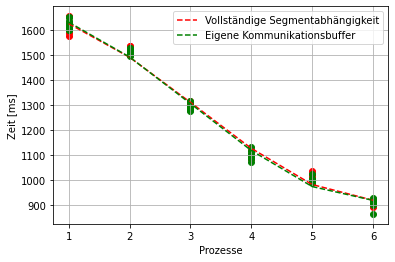

In [6]:
gaspi_seg_eno1_sc14 = eval_collect('gaspi_mfile_eno1_1GB','scale12','blocking',results_path ='../../ssca1/results/')
gaspi_noseg_eno1_sc14 = eval_collect('gaspi_mfile_eno1_1GB','scale12','blocking',results_path ='../../ssca1_no_segment_dependancy/results/')
plot_2(gaspi_seg_eno1_sc14.rank_num,gaspi_seg_eno1_sc14.elapsed_ms,\
       gaspi_noseg_eno1_sc14.rank_num,gaspi_noseg_eno1_sc14.elapsed_ms,'','Vollständige Segmentabhängigkeit','Eigene Kommunikationsbuffer')

filewriter("gaspi","eno1","blocking","segment","1",gaspi_seg_eno1_sc14.elapsed_ms,rank=gaspi_seg_eno1_sc14.rank_num,scale="14")
filewriter("gaspi","eno1","blocking","nosegment","1",gaspi_noseg_eno1_sc14.elapsed_ms,rank=gaspi_noseg_eno1_sc14.rank_num,scale="14")

Segmentabhängig vs. ursprüngliches prefetching vs getuntes prefetching mit queues eno1

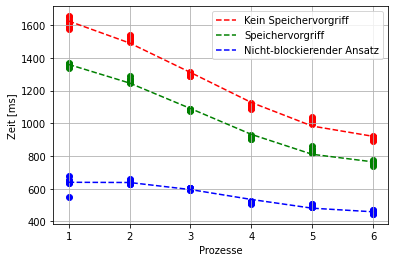

In [7]:
gaspi_seg_eno1_sc14 = eval_collect('gaspi_mfile_eno1_1GB','scale12','blocking',results_path ='../../ssca1/results/')
gaspi_seg_eno1_sc14_pref = eval_collect('gaspi_mfile_eno1_1GB','scale12','nonblocking',results_path ='../../ssca1/results/')
gaspi_seg_eno1_sc14_tu_pref = eval_collect('gaspi_mfile_eno1_1GB','12','nonblocking',results_path ='../results/')
plot_3(gaspi_seg_eno1_sc14.rank_num,gaspi_seg_eno1_sc14.elapsed_ms,\
       gaspi_seg_eno1_sc14_pref.rank_num,gaspi_seg_eno1_sc14_pref.elapsed_ms,\
       gaspi_seg_eno1_sc14_tu_pref.rank_num,gaspi_seg_eno1_sc14_tu_pref.elapsed_ms,\
       '','Kein Speichervorgriff','Speichervorgriff', 'Nicht-blockierender Ansatz')
filewriter("gaspi","eno1","blocking","segment","1",gaspi_seg_eno1_sc14.elapsed_ms,rank=gaspi_seg_eno1_sc14.rank_num,scale="14")
filewriter("gaspi","eno1","nonblocking","segment","1",gaspi_seg_eno1_sc14_pref.elapsed_ms,rank=gaspi_seg_eno1_sc14_pref.rank_num,scale="14")
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_seg_eno1_sc14_tu_pref.elapsed_ms,rank=gaspi_seg_eno1_sc14_tu_pref.rank_num,scale="14")


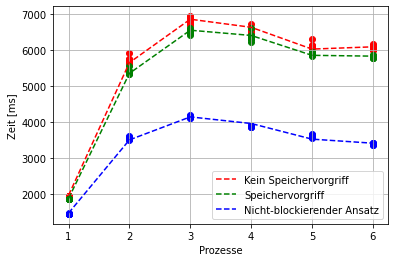

In [8]:
mpi_seg_eno1_sc14 = eval_collect('mpi_mfile_eno1_1GB','scale22','blocking',results_path ='../../ssca1/results/')
mpi_seg_eno1_sc14_pref = eval_collect('mpi_mfile_eno1_1GB','scale22','nonblocking',results_path ='../../ssca1/results/')
mpi_seg_eno1_sc14_tu_pref = eval_collect('mpi_mfile_eno1_1GB','22','nonblocking_non_threaded',results_path ='../results/')
plot_3(mpi_seg_eno1_sc14.rank_num,mpi_seg_eno1_sc14.elapsed_ms,\
       mpi_seg_eno1_sc14_pref.rank_num,mpi_seg_eno1_sc14_pref.elapsed_ms,\
       mpi_seg_eno1_sc14_tu_pref.rank_num,mpi_seg_eno1_sc14_tu_pref.elapsed_ms,\
       '','Kein Speichervorgriff','Speichervorgriff', 'Nicht-blockierender Ansatz')
filewriter("mpi","eno1","blocking","segment","1",mpi_seg_eno1_sc14.elapsed_ms,rank=mpi_seg_eno1_sc14.rank_num,scale="14")
filewriter("mpi","eno1","nonblocking","segment","1",mpi_seg_eno1_sc14_pref.elapsed_ms,rank=mpi_seg_eno1_sc14_pref.rank_num,scale="14")
filewriter("mpi","eno1","nonblockingimproved","segment","1",mpi_seg_eno1_sc14_tu_pref.elapsed_ms,rank=mpi_seg_eno1_sc14_tu_pref.rank_num,scale="14")


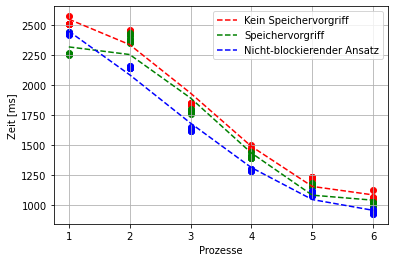

In [9]:
shmem_seg_eno1_sc14 = eval_collect('shmem_mfile_eno1_1GB','scale22','nonblocking',results_path ='../../ssca1/results/')
shmem_seg_eno1_sc14_pref = eval_collect('shmem_mfile_eno1_1GB','scale22','blocking',results_path ='../../ssca1/results/')
shmem_seg_eno1_sc14_tu_pref = eval_collect('shmem_mfile_eno1_1GB','22','nonblocking1',results_path ='../results/')
plot_3(shmem_seg_eno1_sc14.rank_num,shmem_seg_eno1_sc14.elapsed_ms,\
       shmem_seg_eno1_sc14_pref.rank_num,shmem_seg_eno1_sc14_pref.elapsed_ms,\
       shmem_seg_eno1_sc14_tu_pref.rank_num,shmem_seg_eno1_sc14_tu_pref.elapsed_ms,\
       '','Kein Speichervorgriff','Speichervorgriff', 'Nicht-blockierender Ansatz')
filewriter("shmem","eno1","blocking","segment","1",shmem_seg_eno1_sc14.elapsed_ms,rank=shmem_seg_eno1_sc14.rank_num,scale="14")
filewriter("shmem","eno1","nonblocking","segment","1",shmem_seg_eno1_sc14_pref.elapsed_ms,rank=shmem_seg_eno1_sc14_pref.rank_num,scale="14")
filewriter("shmem","eno1","nonblockingimproved","segment","1",shmem_seg_eno1_sc14_tu_pref.elapsed_ms,rank=shmem_seg_eno1_sc14_tu_pref.rank_num,scale="14")


Weak Scaling Eno1 Rank 1-6

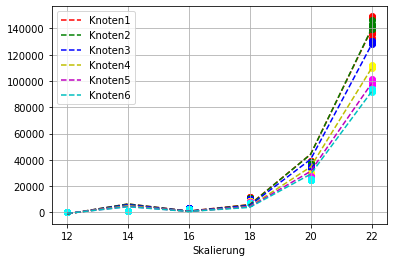

In [10]:
gaspi_eno1_scale_rank1 = eval_collect_weak('gaspi_mfile_eno1_1GB','1','nonblocking',results_path ='../results/')
gaspi_eno1_scale_rank2 = eval_collect_weak('gaspi_mfile_eno1_1GB','2','nonblocking',results_path ='../results/')
gaspi_eno1_scale_rank3 = eval_collect_weak('gaspi_mfile_eno1_1GB','3','nonblocking',results_path ='../results/')
gaspi_eno1_scale_rank4 = eval_collect_weak('gaspi_mfile_eno1_1GB','4','nonblocking',results_path ='../results/')
gaspi_eno1_scale_rank5 = eval_collect_weak('gaspi_mfile_eno1_1GB','5','nonblocking',results_path ='../results/')
gaspi_eno1_scale_rank6 = eval_collect_weak('gaspi_mfile_eno1_1GB','6','nonblocking',results_path ='../results/')

plot_6(gaspi_eno1_scale_rank1.scale_num,gaspi_eno1_scale_rank1.elapsed_ms,\
       gaspi_eno1_scale_rank2.scale_num,gaspi_eno1_scale_rank2.elapsed_ms,\
       gaspi_eno1_scale_rank3.scale_num,gaspi_eno1_scale_rank3.elapsed_ms,\
       gaspi_eno1_scale_rank4.scale_num,gaspi_eno1_scale_rank4.elapsed_ms,\
       gaspi_eno1_scale_rank5.scale_num,gaspi_eno1_scale_rank5.elapsed_ms,\
       gaspi_eno1_scale_rank6.scale_num,gaspi_eno1_scale_rank6.elapsed_ms,\
       '','Knoten1', 'Knoten2','Knoten3','Knoten4','Knoten5','Knoten6',xlabel_='Skalierung')
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_scale_rank1.elapsed_ms,rank="1",scale=gaspi_eno1_scale_rank1.scale_num)
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_scale_rank2.elapsed_ms,rank="2",scale=gaspi_eno1_scale_rank2.scale_num)
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_scale_rank3.elapsed_ms,rank="3",scale=gaspi_eno1_scale_rank3.scale_num)
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_scale_rank4.elapsed_ms,rank="4",scale=gaspi_eno1_scale_rank4.scale_num)
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_scale_rank5.elapsed_ms,rank="5",scale=gaspi_eno1_scale_rank5.scale_num)
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_scale_rank6.elapsed_ms,rank="6",scale=gaspi_eno1_scale_rank6.scale_num)


Weak Scaling Eno1 Eno2 Ib0, rank =2 

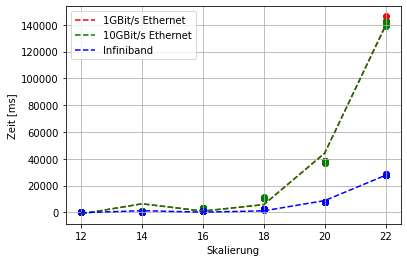

In [11]:
gaspi_eno1_scale_rank2 = eval_collect_weak('gaspi_mfile_eno1_1GB','2','nonblocking',results_path ='../results/')
gaspi_eno2_scale_rank2 = eval_collect_weak('gaspi_mfile_eno2_10GB','2','nonblocking',results_path ='../results/',help='1')
gaspi_ib0_scale_rank2 = eval_collect_weak('gaspi_mfile_ib0','2','nonblocking',results_path ='../results/',help='1')

plot_3(gaspi_eno1_scale_rank2.scale_num,gaspi_eno1_scale_rank2.elapsed_ms,\
       gaspi_eno2_scale_rank2.scale_num,gaspi_eno2_scale_rank2.elapsed_ms,\
       gaspi_ib0_scale_rank2.scale_num,gaspi_ib0_scale_rank2.elapsed_ms,\
       '','1GBit/s Ethernet', '10GBit/s Ethernet','Infiniband',xlabel_ ="Skalierung")

filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_scale_rank2.elapsed_ms,rank="2",scale=gaspi_eno1_scale_rank2.scale_num)
filewriter("gaspi","eno2","nonblockingimproved","segment","1",gaspi_eno2_scale_rank2.elapsed_ms,rank="2",scale=gaspi_eno2_scale_rank2.scale_num)
filewriter("gaspi","ib0","nonblockingimproved","segment","1",gaspi_ib0_scale_rank2.elapsed_ms,rank="2",scale=gaspi_ib0_scale_rank2.scale_num)


Eno 1 Nonblocking segmentabhängig gaspi vs mpi vs openshmem mit getuntem prefetching, getuntes prefetching

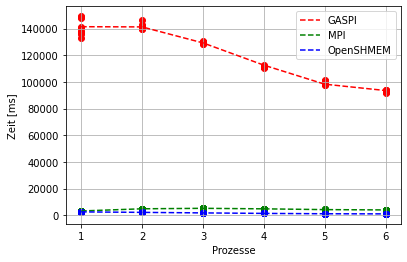

In [12]:
gaspi_seg_eno1_sc22 = eval_collect('gaspi_mfile_eno1_1GB','22','nonblocking1',results_path ='../results/')
mpi_seg_eno1_sc22 = eval_collect('mpi_mfile_eno1_1GB','22','nonblocking1',results_path ='../results/')
shmem_seg_eno1_sc22 = eval_collect('shmem_mfile_eno1_1GB','22','nonblocking1',results_path ='../results/')

plot_3(gaspi_seg_eno1_sc22.rank_num,gaspi_seg_eno1_sc22.elapsed_ms,\
       mpi_seg_eno1_sc22.rank_num,mpi_seg_eno1_sc22.elapsed_ms,\
       shmem_seg_eno1_sc22.rank_num,shmem_seg_eno1_sc22.elapsed_ms,\
       '','GASPI','MPI', 'OpenSHMEM')
filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_seg_eno1_sc22.elapsed_ms,rank=gaspi_seg_eno1_sc22.rank_num,scale="22")
filewriter("mpi","eno1","nonblockingimproved","segment","1",mpi_seg_eno1_sc22.elapsed_ms,rank=mpi_seg_eno1_sc22.rank_num,scale="22")
filewriter("shmem","eno1","nonblockingimproved","segment","1",shmem_seg_eno1_sc22.elapsed_ms,rank=shmem_seg_eno1_sc22.rank_num,scale="22")


Eno 2 Nonblocking segmentabhängig gaspi vs mpi vs openshmem 

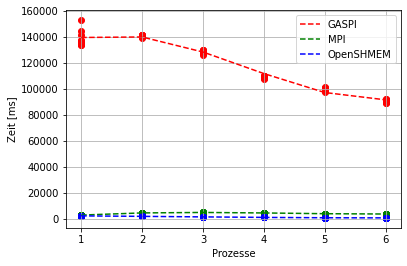

In [13]:
gaspi_seg_eno2_sc22 = eval_collect('gaspi_mfile_eno2_10GB','22','nonblocking1',results_path ='../results/')
mpi_seg_eno2_sc22 = eval_collect('mpi_mfile_eno2_10GB','22','nonblocking1',results_path ='../results/')
shmem_seg_eno2_sc22 = eval_collect('shmem_mfile_eno2_10GB','22','nonblocking1',results_path ='../results/')

plot_3(gaspi_seg_eno2_sc22.rank_num,gaspi_seg_eno2_sc22.elapsed_ms,\
       mpi_seg_eno2_sc22.rank_num,mpi_seg_eno2_sc22.elapsed_ms,\
       shmem_seg_eno2_sc22.rank_num,shmem_seg_eno2_sc22.elapsed_ms,\
       '','GASPI','MPI', 'OpenSHMEM')
filewriter("gaspi","eno2","nonblockingimproved","segment","1",gaspi_seg_eno2_sc22.elapsed_ms,rank=gaspi_seg_eno2_sc22.rank_num,scale="22")
filewriter("mpi","eno2","nonblockingimproved","segment","1",mpi_seg_eno2_sc22.elapsed_ms,rank=mpi_seg_eno2_sc22.rank_num,scale="22")
filewriter("shmem","eno2","nonblockingimproved","segment","1",shmem_seg_eno2_sc22.elapsed_ms,rank=shmem_seg_eno2_sc22.rank_num,scale="22")


Ib0 Nonblocking segmentabhängig gaspi vs mpi vs openshmem 


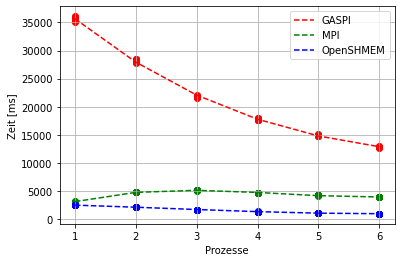

In [14]:
gaspi_seg_ib0_sc22 = eval_collect('gaspi_mfile_ib0','2','nonblocking1',results_path ='../results/')
mpi_seg_ib0_sc22 = eval_collect('mpi_mfile_ib0','22','nonblocking1',results_path ='../results/')
shmem_seg_ib0_sc22 = eval_collect('shmem_mfile_ib0','22','nonblocking1',results_path ='../results/')

plot_3(gaspi_seg_ib0_sc22.rank_num,gaspi_seg_ib0_sc22.elapsed_ms,\
       mpi_seg_ib0_sc22.rank_num,mpi_seg_ib0_sc22.elapsed_ms,\
       shmem_seg_ib0_sc22.rank_num,shmem_seg_ib0_sc22.elapsed_ms,\
       '','GASPI','MPI', 'OpenSHMEM')
filewriter("gaspi","ib0","nonblockingimproved","segment","1",gaspi_seg_ib0_sc22.elapsed_ms,rank=gaspi_seg_ib0_sc22.rank_num,scale="22")
filewriter("mpi","ib0","nonblockingimproved","segment","1",mpi_seg_ib0_sc22.elapsed_ms,rank=mpi_seg_ib0_sc22.rank_num,scale="22")
filewriter("shmem","ib0","nonblockingimproved","segment","1",shmem_seg_ib0_sc22.elapsed_ms,rank=shmem_seg_ib0_sc22.rank_num,scale="22")


Eno 1 Nonblocking segmentabhängig 3 Bilder: gaspi vs mpi vs openshmem

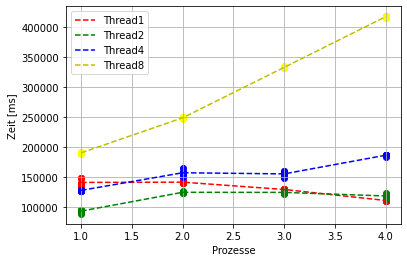

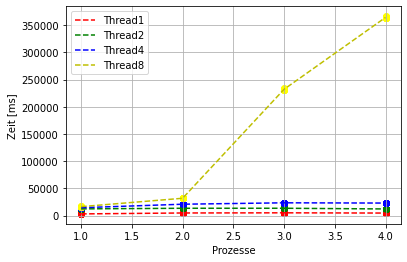

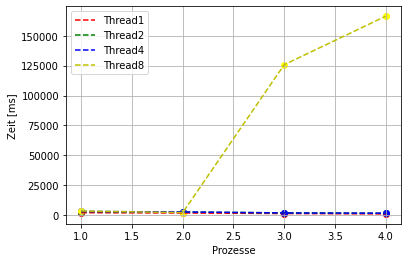

In [41]:
gaspi_eno1_thread1 = eval_collect('gaspi_mfile_eno1_1GB','22','nonblocking1',results_path ='../results/')
gaspi_eno1_thread2 = eval_collect('gaspi_mfile_eno1_1GB','22','nonblocking2',results_path ='../results/')
gaspi_eno1_thread4 = eval_collect('gaspi_mfile_eno1_1GB','22','nonblocking4',results_path ='../results/')
gaspi_eno1_thread8 = eval_collect('gaspi_mfile_eno1_1GB','22','nonblocking8',results_path ='../results/')

plot_4(gaspi_eno1_thread1.rank_num,gaspi_eno1_thread1.elapsed_ms,\
       gaspi_eno1_thread2.rank_num,gaspi_eno1_thread2.elapsed_ms,\
       gaspi_eno1_thread4.rank_num,gaspi_eno1_thread4.elapsed_ms,\
       gaspi_eno1_thread8.rank_num,gaspi_eno1_thread8.elapsed_ms,\
       '','Thread1','Thread2','Thread4','Thread8')

mpi_eno1_thread1 = eval_collect('mpi_mfile_eno1_1GB','22','nonblocking1',results_path ='../results/')
mpi_eno1_thread2 = eval_collect('mpi_mfile_eno1_1GB','22','nonblocking2',results_path ='../results/')
mpi_eno1_thread4 = eval_collect('mpi_mfile_eno1_1GB','22','nonblocking4',results_path ='../results/')
mpi_eno1_thread8 = eval_collect('mpi_mfile_eno1_1GB','22','nonblocking8',results_path ='../results/')

plot_4(mpi_eno1_thread1.rank_num,mpi_eno1_thread1.elapsed_ms,\
       mpi_eno1_thread2.rank_num,mpi_eno1_thread2.elapsed_ms,\
       mpi_eno1_thread4.rank_num,mpi_eno1_thread4.elapsed_ms,\
       mpi_eno1_thread8.rank_num,mpi_eno1_thread8.elapsed_ms,\
       '','Thread1','Thread2','Thread4','Thread8')

shmem_eno1_thread1 = eval_collect('shmem_mfile_eno1_1GB','22','nonblocking1',results_path ='../results/')
shmem_eno1_thread2 = eval_collect('shmem_mfile_eno1_1GB','22','nonblocking2',results_path ='../results/')
shmem_eno1_thread4 = eval_collect('shmem_mfile_eno1_1GB','22','nonblocking4',results_path ='../results/')
shmem_eno1_thread8 = eval_collect('shmem_mfile_eno1_1GB','22','nonblocking8',results_path ='../results/')

plot_4_no_trendline(ranks,shmem_eno1_thread1.elapsed_ms_mean,\
       ranks,shmem_eno1_thread2.elapsed_ms_mean,\
       ranks,shmem_eno1_thread4.elapsed_ms_mean,\
       ranks,shmem_eno1_thread8.elapsed_ms_mean,\
       '','Thread1','Thread2','Thread4','Thread8')

filewriter("gaspi","eno1","nonblockingimproved","segment","1",gaspi_eno1_thread1.elapsed_ms,rank=gaspi_eno1_thread1.rank_num,scale="22")
filewriter("gaspi","eno1","nonblockingimproved","segment","2",gaspi_eno1_thread2.elapsed_ms,rank=gaspi_eno1_thread2.rank_num,scale="22")
filewriter("gaspi","eno1","nonblockingimproved","segment","4",gaspi_eno1_thread4.elapsed_ms,rank=gaspi_eno1_thread4.rank_num,scale="22")
filewriter("gaspi","eno1","nonblockingimproved","segment","8",gaspi_eno1_thread8.elapsed_ms,rank=gaspi_eno1_thread8.rank_num,scale="22")
filewriter("mpi","eno1","nonblockingimproved","segment","1",mpi_eno1_thread1.elapsed_ms,rank=mpi_eno1_thread1.rank_num,scale="22")
filewriter("mpi","eno1","nonblockingimproved","segment","2",mpi_eno1_thread2.elapsed_ms,rank=mpi_eno1_thread2.rank_num,scale="22")
filewriter("mpi","eno1","nonblockingimproved","segment","4",mpi_eno1_thread4.elapsed_ms,rank=mpi_eno1_thread4.rank_num,scale="22")
filewriter("mpi","eno1","nonblockingimproved","segment","8",mpi_eno1_thread8.elapsed_ms,rank=mpi_eno1_thread8.rank_num,scale="22")
filewriter("shmem","eno1","nonblockingimproved","segment","1",shmem_eno1_thread1.elapsed_ms,rank=shmem_eno1_thread1.rank_num,scale="22")
filewriter("shmem","eno1","nonblockingimproved","segment","2",shmem_eno1_thread2.elapsed_ms,rank=shmem_eno1_thread2.rank_num,scale="22")
filewriter("shmem","eno1","nonblockingimproved","segment","4",shmem_eno1_thread4.elapsed_ms,rank=shmem_eno1_thread4.rank_num,scale="22")
filewriter("shmem","eno1","nonblockingimproved","segment","8",shmem_eno1_thread8.elapsed_ms,rank=shmem_eno1_thread8.rank_num,scale="22")


Eno 2 Nonblocking segmentabhängig 3 Bilder: gaspi vs mpi vs openshmem

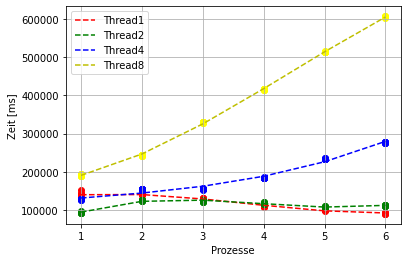

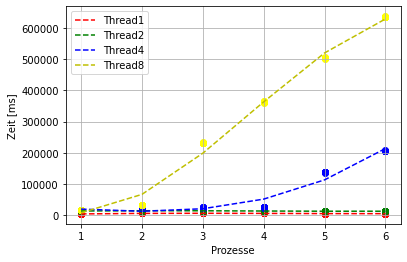

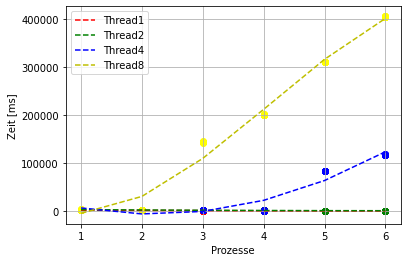

In [20]:
gaspi_eno2_thread1 = eval_collect('gaspi_mfile_eno2_10GB','22','nonblocking1',results_path ='../results/')
gaspi_eno2_thread2 = eval_collect('gaspi_mfile_eno2_10GB','22','nonblocking2',results_path ='../results/')
gaspi_eno2_thread4 = eval_collect('gaspi_mfile_eno2_10GB','22','nonblocking4',results_path ='../results/')
gaspi_eno2_thread8 = eval_collect('gaspi_mfile_eno2_10GB','22','nonblocking8',results_path ='../results/')

plot_4(gaspi_eno2_thread1.rank_num,gaspi_eno2_thread1.elapsed_ms,\
       gaspi_eno2_thread2.rank_num,gaspi_eno2_thread2.elapsed_ms,\
       gaspi_eno2_thread4.rank_num,gaspi_eno2_thread4.elapsed_ms,\
       gaspi_eno2_thread8.rank_num,gaspi_eno2_thread8.elapsed_ms,\
       '','Thread1','Thread2','Thread4','Thread8')

mpi_eno2_thread1 = eval_collect('mpi_mfile_eno2_10GB','22','nonblocking1',results_path ='../results/')
mpi_eno2_thread2 = eval_collect('mpi_mfile_eno2_10GB','22','nonblocking2',results_path ='../results/')
mpi_eno2_thread4 = eval_collect('mpi_mfile_eno2_10GB','22','nonblocking4',results_path ='../results/')
mpi_eno2_thread8 = eval_collect('mpi_mfile_eno2_10GB','22','nonblocking8',results_path ='../results/')

plot_4(mpi_eno2_thread1.rank_num,mpi_eno2_thread1.elapsed_ms,\
       mpi_eno2_thread2.rank_num,mpi_eno2_thread2.elapsed_ms,\
       mpi_eno2_thread4.rank_num,mpi_eno2_thread4.elapsed_ms,\
       mpi_eno2_thread8.rank_num,mpi_eno2_thread8.elapsed_ms,\
       '','Thread1','Thread2','Thread4','Thread8')

shmem_eno2_thread1 = eval_collect('shmem_mfile_eno2_10GB','22','nonblocking1',results_path ='../results/')
shmem_eno2_thread2 = eval_collect('shmem_mfile_eno2_10GB','22','nonblocking2',results_path ='../results/')
shmem_eno2_thread4 = eval_collect('shmem_mfile_eno2_10GB','22','nonblocking4',results_path ='../results/')
shmem_eno2_thread8 = eval_collect('shmem_mfile_eno2_10GB','22','nonblocking8',results_path ='../results/')

plot_4(shmem_eno2_thread1.rank_num,shmem_eno2_thread1.elapsed_ms,\
       shmem_eno2_thread2.rank_num,shmem_eno2_thread2.elapsed_ms,\
       shmem_eno2_thread4.rank_num,shmem_eno2_thread4.elapsed_ms,\
       shmem_eno2_thread8.rank_num,shmem_eno2_thread8.elapsed_ms,\
       '','Thread1','Thread2','Thread4','Thread8')
filewriter("gaspi","eno2","nonblockingimproved","segment","1",gaspi_eno2_thread1.elapsed_ms,rank=gaspi_eno2_thread1.rank_num,scale="22")
filewriter("gaspi","eno2","nonblockingimproved","segment","2",gaspi_eno2_thread2.elapsed_ms,rank=gaspi_eno2_thread2.rank_num,scale="22")
filewriter("gaspi","eno2","nonblockingimproved","segment","4",gaspi_eno2_thread4.elapsed_ms,rank=gaspi_eno2_thread4.rank_num,scale="22")
filewriter("gaspi","eno2","nonblockingimproved","segment","8",gaspi_eno2_thread8.elapsed_ms,rank=gaspi_eno2_thread8.rank_num,scale="22")
filewriter("mpi","eno2","nonblockingimproved","segment","1",mpi_eno2_thread1.elapsed_ms,rank=mpi_eno2_thread1.rank_num,scale="22")
filewriter("mpi","eno2","nonblockingimproved","segment","2",mpi_eno2_thread2.elapsed_ms,rank=mpi_eno2_thread2.rank_num,scale="22")
filewriter("mpi","eno2","nonblockingimproved","segment","4",mpi_eno2_thread4.elapsed_ms,rank=mpi_eno2_thread4.rank_num,scale="22")
filewriter("mpi","eno2","nonblockingimproved","segment","8",mpi_eno2_thread8.elapsed_ms,rank=mpi_eno2_thread8.rank_num,scale="22")
filewriter("shmem","eno2","nonblockingimproved","segment","1",shmem_eno2_thread1.elapsed_ms,rank=shmem_eno2_thread1.rank_num,scale="22")
filewriter("shmem","eno2","nonblockingimproved","segment","2",shmem_eno2_thread2.elapsed_ms,rank=shmem_eno2_thread2.rank_num,scale="22")
filewriter("shmem","eno2","nonblockingimproved","segment","4",shmem_eno2_thread4.elapsed_ms,rank=shmem_eno2_thread4.rank_num,scale="22")
filewriter("shmem","eno2","nonblockingimproved","segment","8",shmem_eno2_thread8.elapsed_ms,rank=shmem_eno2_thread8.rank_num,scale="22")


Ib0 Nonblocking segmentabhängig 3 Bilder: gaspi vs mpi vs openshmem

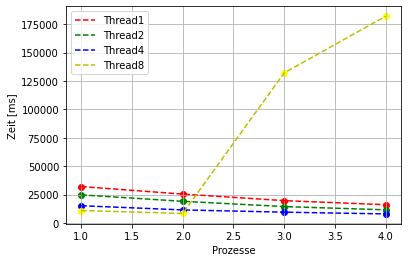

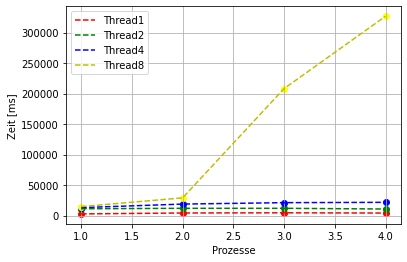

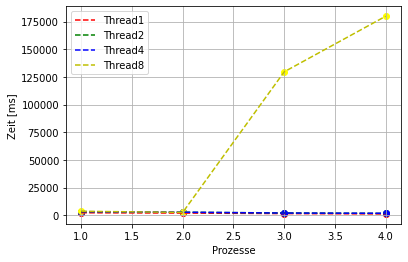

In [40]:
gaspi_ib0_thread1 = eval_collect('gaspi_mfile_ib0','2','nonblocking1',results_path ='../results/')
gaspi_ib0_thread2 = eval_collect('gaspi_mfile_ib0','2','nonblocking2',results_path ='../results/')
gaspi_ib0_thread4 = eval_collect('gaspi_mfile_ib0','2','nonblocking4',results_path ='../results/')
gaspi_ib0_thread8 = eval_collect('gaspi_mfile_ib0','2','nonblocking8',results_path ='../results/')

plot_4_no_trendline(ranks,gaspi_ib0_thread1.elapsed_ms_mean,\
                   ranks,gaspi_ib0_thread2.elapsed_ms_mean,\
                   ranks,gaspi_ib0_thread4.elapsed_ms_mean,\
                   ranks,gaspi_ib0_thread8.elapsed_ms_mean,\
                   '','Thread1','Thread2','Thread4','Thread8')

mpi_ib0_thread1 = eval_collect('mpi_mfile_ib0','22','nonblocking1',results_path ='../results/')
mpi_ib0_thread2 = eval_collect('mpi_mfile_ib0','22','nonblocking2',results_path ='../results/')
mpi_ib0_thread4 = eval_collect('mpi_mfile_ib0','22','nonblocking4',results_path ='../results/')
mpi_ib0_thread8 = eval_collect('mpi_mfile_ib0','22','nonblocking8',results_path ='../results/')

plot_4_no_trendline(ranks,mpi_ib0_thread1.elapsed_ms_mean,\
       ranks,mpi_ib0_thread2.elapsed_ms_mean,\
       ranks,mpi_ib0_thread4.elapsed_ms_mean,\
       ranks,mpi_ib0_thread8.elapsed_ms_mean,\
       '','Thread1','Thread2','Thread4','Thread8')

shmem_ib0_thread1 = eval_collect('shmem_mfile_ib0','22','nonblocking1',results_path ='../results/')
shmem_ib0_thread2 = eval_collect('shmem_mfile_ib0','22','nonblocking2',results_path ='../results/')
shmem_ib0_thread4 = eval_collect('shmem_mfile_ib0','22','nonblocking4',results_path ='../results/')
shmem_ib0_thread8 = eval_collect('shmem_mfile_ib0','22','nonblocking8',results_path ='../results/')

plot_4_no_trendline(ranks,shmem_ib0_thread1.elapsed_ms_mean,\
       ranks,shmem_ib0_thread2.elapsed_ms_mean,\
       ranks,shmem_ib0_thread4.elapsed_ms_mean,\
       ranks,shmem_ib0_thread8.elapsed_ms_mean,\
       '','Thread1','Thread2','Thread4','Thread8')
filewriter("gaspi","ib0","nonblockingimproved","segment","1",gaspi_ib0_thread1.elapsed_ms,rank=gaspi_ib0_thread1.rank_num,scale="22")
filewriter("gaspi","ib0","nonblockingimproved","segment","2",gaspi_ib0_thread2.elapsed_ms,rank=gaspi_ib0_thread2.rank_num,scale="22")
filewriter("gaspi","ib0","nonblockingimproved","segment","4",gaspi_ib0_thread4.elapsed_ms,rank=gaspi_ib0_thread4.rank_num,scale="22")
filewriter("gaspi","ib0","nonblockingimproved","segment","8",gaspi_ib0_thread8.elapsed_ms,rank=gaspi_ib0_thread8.rank_num,scale="22")
filewriter("mpi","ib0","nonblockingimproved","segment","1",mpi_ib0_thread1.elapsed_ms,rank=mpi_ib0_thread1.rank_num,scale="22")
filewriter("mpi","ib0","nonblockingimproved","segment","2",mpi_ib0_thread2.elapsed_ms,rank=mpi_ib0_thread2.rank_num,scale="22")
filewriter("mpi","ib0","nonblockingimproved","segment","4",mpi_ib0_thread4.elapsed_ms,rank=mpi_ib0_thread4.rank_num,scale="22")
filewriter("mpi","ib0","nonblockingimproved","segment","8",mpi_ib0_thread8.elapsed_ms,rank=mpi_ib0_thread8.rank_num,scale="22")
filewriter("shmem","ib0","nonblockingimproved","segment","1",shmem_ib0_thread1.elapsed_ms,rank=shmem_ib0_thread1.rank_num,scale="22")
filewriter("shmem","ib0","nonblockingimproved","segment","2",shmem_ib0_thread2.elapsed_ms,rank=shmem_ib0_thread2.rank_num,scale="22")
filewriter("shmem","ib0","nonblockingimproved","segment","4",shmem_ib0_thread4.elapsed_ms,rank=shmem_ib0_thread4.rank_num,scale="22")
filewriter("shmem","ib0","nonblockingimproved","segment","8",shmem_ib0_thread8.elapsed_ms,rank=shmem_ib0_thread8.rank_num,scale="22")


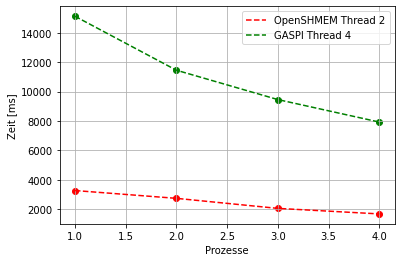

In [45]:
ranks=[1,2,3,4]
gaspi_ib0_thread4 = eval_collect('gaspi_mfile_ib0','2','nonblocking4',results_path ='../results/')
shmem_ib0_thread4 = eval_collect('shmem_mfile_ib0','22','nonblocking4',results_path ='../results/')
plot_2_no_trendline(ranks,shmem_ib0_thread2.elapsed_ms_mean,\
       ranks,gaspi_ib0_thread4.elapsed_ms_mean,\
       '','OpenSHMEM Thread 2','GASPI Thread 4')

In [46]:
print(shmem_ib0_thread2.elapsed_ms_mean)

[3260.1, 2728.2, 2044.4, 1668.0]


In [47]:
print(gaspi_ib0_thread4.elapsed_ms_mean)

[15124.9, 11451.3, 9452.0, 7921.6]
